![My Logo](https://thoughtsociety.org/wp-content/uploads/2019/03/ts_notebook_header.png)

## Housing Price Prediction with multiple models

#### In this demo, we will apply multiple machine learning models on the housing dataset and evaluate the accuracy of each. 

Multiple model evaluation is a common technique for experimentally choosing the best model for a particular dataset and project.

We will try five different models as listed here:

You are encouraged to explore each of these models for yourself with the links provided in the demo notebook.

* [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [RANSAC Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html)
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

We will clean and scale our data so it is ready to be passed between the 5 different classifiers and then look at the resulting accuracy of our prediction by computing its error.

At the end, we will create a table of the error results for each of the classifiers to make model evaluation simpler.

### Dataset Description

This is based on a StatLab repository.
Here is a [short description]('http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html')

Data from Californai districts, collected during the 1990 Census provided the ideal feature set that we could use to apply several different machine learning models to. Remember, this data is 30 years old so the values will not seem realistic by today's California real estate markets.

In this notebook, we will make use of the following features to predict **median_house_value**:

* Median Income
* Longitude
* Latitude
* housing_median_age
* total_rooms
* total_bedrooms
* population
* households
* median_income
* ocean_proximity


### median_house_value is our target

### Thanks to 

[Suprabhat Kumar]('https://www.kaggle.com/suprabhatsk') -

who first posted this to Kaggle 8 months ago. Kudos, as it presents a very instructive kernel on the ML process where model selection is important.

**What we will do is to divide and conquor as Suprabhat suggests.**

1. Exploratory Data Analysis
2. Data Hygiene
3. Scaling
4. Train_Test_Split
5. Select ML Algos
6. Run each Algo
7. Evaluate each Algo
8. Try others to find the highest accuracy
9. Present table of results

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Retrieve from my github repo
github_housing_data = "https://raw.githubusercontent.com/thoughtsociety/ads_track4/master/datasets/housing.csv"
df = pd.read_csv(github_housing_data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## EDA

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Convert ocean_proximity from categorical to numerical

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

**Working with categorical data**

In [8]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

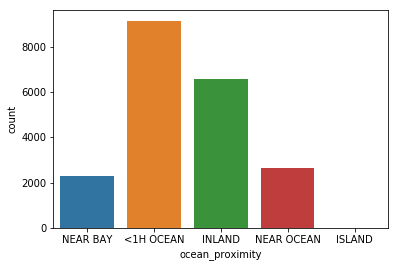

In [9]:
sns.countplot(df.ocean_proximity)

In [10]:
# The binarization of a categorical feature 
new_val = pd.get_dummies(df.ocean_proximity)

In [11]:
new_val.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [12]:
new_val.columns

Index(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

In [13]:
# add the new categorical features to the dataframe
df[new_val.columns] = new_val

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [16]:
# add the target back into the df
df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
       , '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [17]:
df.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,0.442636,0.317393,0.000242,0.110950,0.128779,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,0.496710,0.465473,0.015563,0.314077,0.334963,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,0.000000,0.000000,0.000000,0.000000,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,1.000000,1.000000,0.000000,0.000000,0.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


In [18]:
# Show the correlation between variables using a correlation plot

In [19]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,0.321121,-0.055575,0.009446,-0.474489,0.045509,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.446969,0.351166,-0.016572,0.358771,-0.160818,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.045300,-0.236645,0.017020,0.255172,0.021622,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,-0.003031,0.025624,-0.007572,-0.023022,-0.009175,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.018314,-0.006463,-0.004361,-0.019873,0.000679,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,0.074613,-0.020732,-0.010412,-0.060880,-0.024264,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.042435,-0.039402,-0.009077,-0.010093,0.001714,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.168876,-0.237496,-0.009228,0.056197,0.027344,0.688075
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,1.000000,-0.607669,-0.013872,-0.314813,-0.342620,0.256617
INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006463,-0.020732,-0.039402,-0.237496,-0.607669,1.000000,-0.010614,-0.240887,-0.262163,-0.484859


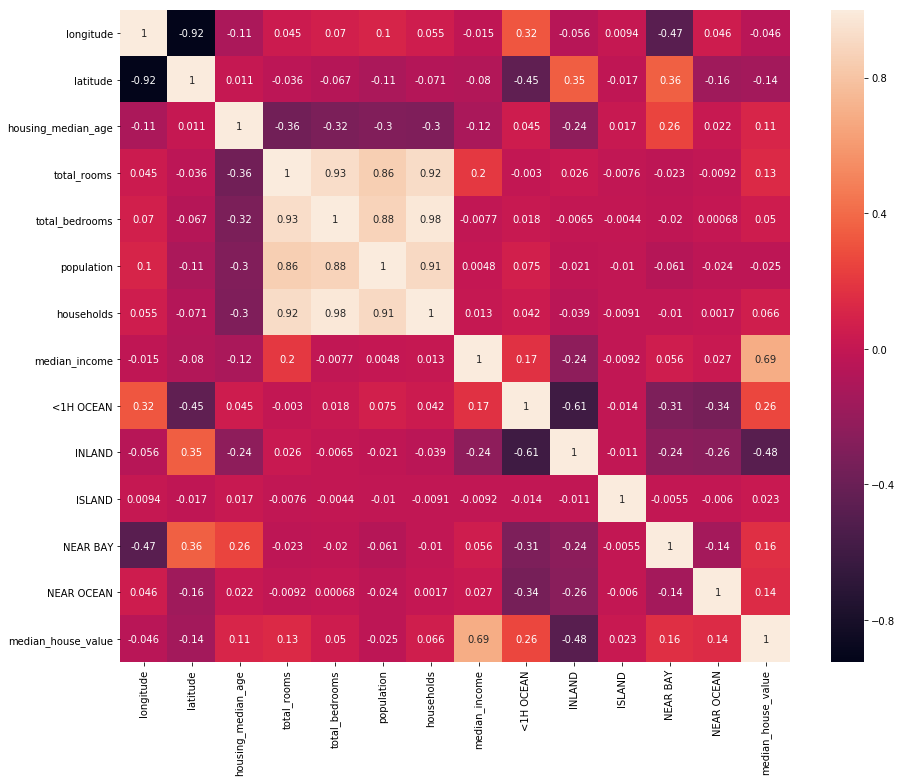

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

In [21]:
# Looks like Median_income has the most profound effect on median house value

df.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e3d8a58>,
      dtype=object)

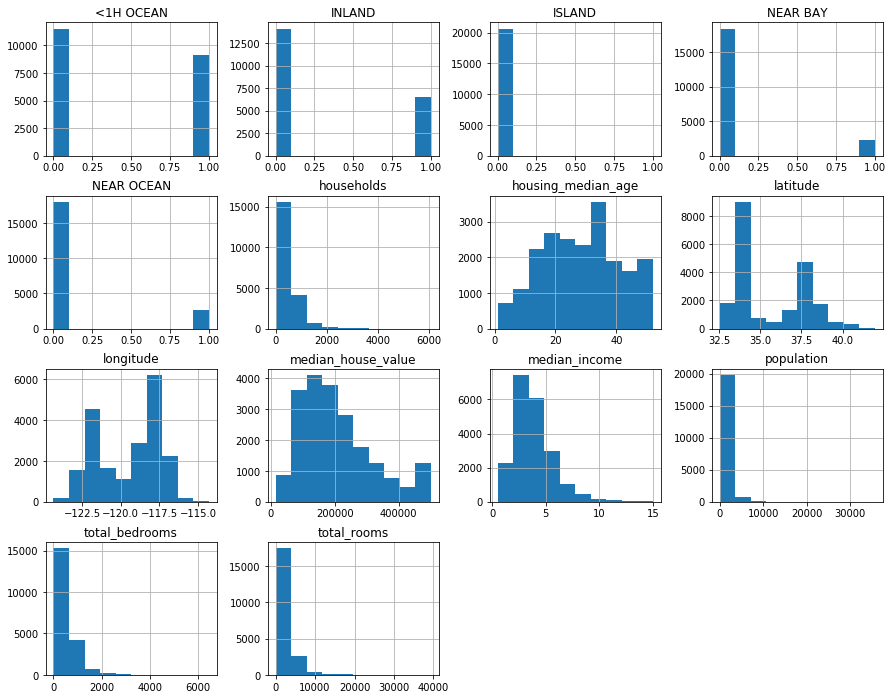

In [22]:
# If we look at the distributions of all features, we can get a better view of the features themselves
df.hist(figsize=(15,12))

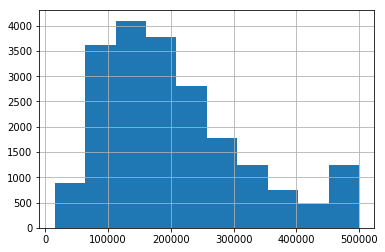

In [23]:
# Distribution of median house value
df.median_house_value.hist()

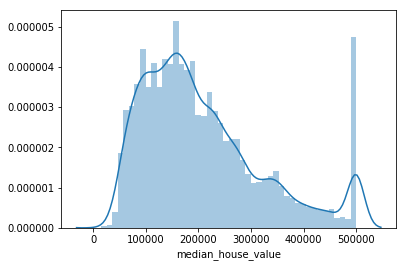

In [24]:
# Adding kernel density estimation to the histogram
sns.distplot(df.median_house_value,kde=True)

In [25]:
# Median house value falls between $100,000 to $300,000 with few exceptions. 

**Data Cleaning**

In [26]:
# How many null values are there in the dataset?
df.isna().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
median_house_value      0
dtype: int64

#### Imputation

In [27]:
# 207 null values for total_bedrooms is too large to cut the entire observation (rows)
# We are better off replacing those (imputation) with the mean of total_bedrooms
df = df.fillna(df.mean())

In [28]:
df.isna().sum() 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
median_house_value    0
dtype: int64

In [29]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0


**Data Scaling**

Let's use sklearn preprocessing - StandarScalar

In [30]:
from sklearn import preprocessing
convert = preprocessing.StandardScaler() 

In [31]:
df.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'median_house_value'],
      dtype='object')

In [32]:
# Drop median_house_value from our features since it is the target
# add that to 'label' because that will be our target

feature = df.drop(['median_house_value'], axis=1)
label = df.median_house_value

In [33]:
# Do a combination fit & transform using StandardScaler on feature.values
featureT = convert.fit_transform(feature.values)

In [34]:
featureT

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [35]:
# Then scale the target values and reshape to +-1 
labelT = convert.fit_transform(df.median_house_value.values.reshape(-1,1)).flatten() 

In [36]:
labelT[0:40]

array([ 2.12963148,  1.31415614,  1.25869341,  1.16510007,  1.17289952,
        0.54461086,  0.80025935,  0.29936163,  0.17197069,  0.47008283,
        0.64687025,  0.30282805,  0.05757883, -0.13480749, -0.41298771,
       -0.57937588, -0.47105025, -0.4450521 , -0.41732074, -0.38092333,
       -0.5143805 , -0.40778808, -0.8055598 , -0.92861771, -0.64350465,
       -0.86102252, -0.97974741, -0.87835462, -0.84889005, -0.64870428,
       -0.73276497, -0.79429393, -0.83589097, -0.88355425, -0.84195721,
       -0.95028284, -0.88702067, -0.8922203 , -0.13394089, -0.26739807])

**Split the data into train and test**

In [37]:
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.25, random_state=19)                                   

**ML Model - Linear Regression**

Run the fit and predict with an R2_score output

In [38]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)
r2_score(linear_reg.predict(feature_train),label_train)

0.4546449669751744

**Cross Validation Score**

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
# 10 folds for splitting strategy
cross_val_score(linear_reg, feature_train,label_train,cv=10) 

array([0.65770935, 0.64025886, 0.61079368, 0.65144007, 0.63680248,
       0.65351948, 0.63481028, 0.64526928, 0.66678814, 0.66110202])

In [41]:
reg_score = r2_score(linear_reg.predict(feature_test),label_test) 

In [42]:
reg_score

0.4430564564772581

In [43]:
linear_reg.coef_

array([-4.63501788e-01, -4.72195172e-01,  1.11811490e-01, -7.90493769e-02,
        2.59408661e-01, -4.37114976e-01,  2.91206511e-01,  6.31091302e-01,
       -3.86597902e+11, -3.62285453e+11, -1.21127917e+10, -2.44451545e+11,
       -2.60707483e+11])

In [44]:
pd.DataFrame(linear_reg.coef_, index=feature.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient')

,Coefficient
median_income,6.310913e-01
households,2.912065e-01
total_bedrooms,2.594087e-01
housing_median_age,1.118115e-01
total_rooms,-7.904938e-02
population,-4.371150e-01
longitude,-4.635018e-01
latitude,-4.721952e-01
ISLAND,-1.211279e+10
NEAR BAY,-2.444515e+11


In [45]:
# Median income has the most effect on median_selling_price
# Co-effecient shows that an increase of 1 unit of median income will increase target (median_house_value) by $63.

In [46]:
df.corr().median_house_value.sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

****RANSAC Regression****

In [47]:
ransac_reg = linear_model.RANSACRegressor()

In [48]:
ransac_reg.fit(feature_train,label_train)
r2_score(ransac_reg.predict(feature_train),label_train)

0.24961845750760625

In [49]:
ransac_score = r2_score(ransac_reg.predict(feature_test),label_test)

In [50]:
ransac_score

0.2085275234983197

In [51]:
# Ransac regressor performing much worse than Linear Regresson

**Ridge Regressor**

In [52]:
ridge_reg = linear_model.Ridge(random_state=19) 
ridge_reg.fit(feature_train,label_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=19, solver='auto', tol=0.001)

In [53]:
r2_score(ridge_reg.predict(feature_train),label_train)

0.4543939988471595

In [54]:
ridge_score = r2_score(ridge_reg.predict(feature_test),label_test) 

In [55]:
ridge_score

0.4428103463811841

In [56]:
ridge_reg.coef_

array([-0.4629629 , -0.47172028,  0.11172918, -0.07917887,  0.25947085,
       -0.43681751,  0.29109023,  0.63112401,  0.05375614, -0.1100102 ,
        0.02479106,  0.0250194 ,  0.04854775])

In [57]:
pd.DataFrame(ridge_reg.coef_, index=feature.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient') 

,Coefficient
median_income,0.631124
households,0.291090
total_bedrooms,0.259471
housing_median_age,0.111729
<1H OCEAN,0.053756
NEAR OCEAN,0.048548
NEAR BAY,0.025019
ISLAND,0.024791
total_rooms,-0.079179
INLAND,-0.110010


**Decision Tree Regressor**

In [58]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(feature_train,label_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [59]:
r2_score(tree_reg.predict(feature_train),label_train)

0.9999999999999545

In [60]:
# 99% seems like overfitting. Let's cross validate it.

cross_val_score(tree_reg, feature_train, label_train, cv=10)


array([0.66805861, 0.6588299 , 0.58592794, 0.65410782, 0.65912369,
       0.61367318, 0.64282809, 0.63519292, 0.61883449, 0.67672688])

In [61]:
tree_score = r2_score(tree_reg.predict(feature_test),label_test) 
tree_score

0.6295514772817613

In [62]:
# ah. CV brings it down to earth.

**Random Forest Regressor**

In [63]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [64]:
forest_reg.fit(feature_train,label_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
r2_score(forest_reg.predict(feature_train),label_train)

0.9596197185476723

In [66]:
cross_val_score(forest_reg, feature_train, label_train, cv=10)

array([0.80946576, 0.79191121, 0.7518755 , 0.80220982, 0.80587854,
       0.80345336, 0.79868428, 0.78803421, 0.78788271, 0.81956743])

In [67]:
# let's see how well the random forest regressor fits well with the test data
forest_score = r2_score(forest_reg.predict(feature_test),label_test) 

In [68]:
forest_score

0.7538865503816681

In [69]:
# 75% is not a bad score. 
# Let's look at all of them together

In [70]:
data = [reg_score, ransac_score, ridge_score, tree_score, forest_score]
index = ['Linear Regression', 'Ransac Regression', 'Ridge Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Random Forest Regressor,0.753887
Decision Tree Regressor,0.629551
Linear Regression,0.443056
Ridge Regression,0.442810
Ransac Regression,0.208528


In [71]:
# Random forest regressor performs best.